# Assignment 9

1. Calculate Pi value using openMPI send and receive messages for atleast 35-40 terms.
2. Change the value on n as 2, 4, 8, 16.
3. Analyze the performance improvement using number of processes.

In [1]:
import mpi4py
from mpi4py import MPI

In [2]:
import time

In [3]:
TERMS = 40

In [4]:
def calculate_pi(rank, num_processes, terms):
    partial_sum = 0.0
    for i in range(rank, terms, num_processes):
        if i % 2 == 0:
            partial_sum += 1.0 / (2 * i + 1)
        else:
            partial_sum -= 1.0 / (2 * i + 1)
    return partial_sum * 4

In [5]:
if __name__ == "__main__":
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    terms = 40

    start_time = time.time()

    partial_pi = calculate_pi(rank, size, terms)
    print(f"calculated Rank {rank} : Pi = {partial_pi}, Time = {time.time() - start_time}")

    if rank == 0:
        total_pi = partial_pi
        for i in range(1, size):
            partial_result, partial_time = comm.recv(source=i)
            total_pi += partial_result
            print(f"Received from Rank {i}: Pi = {partial_result}, Time = {partial_time}")

        print("Number of processes:", size)
        print("Estimated Pi:", total_pi)
        print("Execution time:", time.time() - start_time, "seconds")
    else:
        print(f"Sending from Rank {rank}: Pi = {partial_pi}, Time = {time.time() - start_time}")
        comm.send((partial_pi, time.time() - start_time), dest=0)

calculated Rank 0 : Pi = 3.116596556793833, Time = 0.0
Number of processes: 1
Estimated Pi: 3.116596556793833
Execution time: 0.0 seconds


In [6]:
!mpiexec -n 2 python hpc-as9.py

calculated Rank 1 : Pi = -4.0941172405577415, Time = 0.0
Sending from Rank 1: Pi = -4.0941172405577415, Time = 0.0
calculated Rank 0 : Pi = 7.210713797351573, Time = 0.0
Received from Rank 1: Pi = -4.0941172405577415, Time = 0.0
Number of processes: 2
Estimated Pi: 3.116596556793832
Execution time: 0.0030989646911621094 seconds


In [7]:
!mpiexec -n 4 python hpc-as9.py

calculated Rank 2 : Pi = 1.8840610646940703, Time = 0.0
Sending from Rank 2: Pi = 1.8840610646940703, Time = 0.0
calculated Rank 3 : Pi = -1.5719013009615963, Time = 0.0
Sending from Rank 3: Pi = -1.5719013009615963, Time = 0.0
calculated Rank 1 : Pi = -2.5222159395961445, Time = 0.0
Sending from Rank 1: Pi = -2.5222159395961445, Time = 0.0
calculated Rank 0 : Pi = 5.326652732657504, Time = 0.0
Received from Rank 1: Pi = -2.5222159395961445, Time = 0.0
Received from Rank 2: Pi = 1.8840610646940703, Time = 0.0
Received from Rank 3: Pi = -1.5719013009615963, Time = 0.0
Number of processes: 4
Estimated Pi: 3.1165965567938327
Execution time: 0.005960226058959961 seconds


In [8]:
!mpiexec -n 8 python hpc-as9.py

calculated Rank 7 : Pi = -0.5949302825943747, Time = 0.0
Sending from Rank 7: Pi = -0.5949302825943747, Time = 0.0
calculated Rank 3 : Pi = -0.9769710183672217, Time = 0.0
Sending from Rank 3: Pi = -0.9769710183672217, Time = 0.0
calculated Rank 5 : Pi = -0.7259377111012902, Time = 0.0
Sending from Rank 5: Pi = -0.7259377111012902, Time = 0.0
calculated Rank 2 : Pi = 1.2320270111902598, Time = 0.0
Sending from Rank 2: Pi = 1.2320270111902598, Time = 0.0
calculated Rank 4 : Pi = 0.826975379198637, Time = 0.0
Sending from Rank 4: Pi = 0.826975379198637, Time = 0.0
calculated Rank 1 : Pi = -1.7962782284948542, Time = 0.0
Sending from Rank 1: Pi = -1.7962782284948542, Time = 0.0
calculated Rank 6 : Pi = 0.6520340535038104, Time = 0.0
Sending from Rank 6: Pi = 0.6520340535038104, Time = 0.0
calculated Rank 0 : Pi = 4.499677353458866, Time = 0.0
Received from Rank 1: Pi = -1.7962782284948542, Time = 0.0
Received from Rank 2: Pi = 1.2320270111902598, Time = 0.0
Received from Rank 3: Pi = -0.9

In [9]:
!mpiexec -n 16 python hpc-as9.py

calculated Rank 14 : Pi = 0.20350480497456191, Time = 0.0
Sending from Rank 14: Pi = 0.20350480497456191, Time = 0.0
calculated Rank 7 : Pi = -0.40240596103779513, Time = 0.0
Sending from Rank 7: Pi = -0.40240596103779513, Time = 0.0
calculated Rank 11 : Pi = -0.2466403162055336, Time = 0.0
Sending from Rank 11: Pi = -0.2466403162055336, Time = 0.0
calculated Rank 8 : Pi = 0.3169267707082833, Time = 0.0
Sending from Rank 8: Pi = 0.3169267707082833, Time = 0.0
calculated Rank 3 : Pi = -0.730330702161688, Time = 0.0
Sending from Rank 3: Pi = -0.730330702161688, Time = 0.0
calculated Rank 5 : Pi = -0.5099929527836504, Time = 0.0
Sending from Rank 5: Pi = -0.5099929527836504, Time = 0.0
calculated Rank 1 : Pi = -1.507320540156361, Time = 0.0
Sending from Rank 1: Pi = -1.507320540156361, Time = 0.0
calculated Rank 15 : Pi = -0.19252432155657961, Time = 0.0
Sending from Rank 15: Pi = -0.19252432155657961, Time = 0.0
calculated Rank 2 : Pi = 0.9660791226008618, Time = 0.0
Sending from Rank 2:

In [10]:
total_time = [0.0030989646911621094 , 0.005960226058959961 , 0.005739927291870117 , 0.006808042526245117]
total_time

[0.0030989646911621094,
 0.005960226058959961,
 0.005739927291870117,
 0.006808042526245117]

In [11]:
ranks = [2,4,8,16]
ranks

[2, 4, 8, 16]

In [13]:
import matplotlib.pyplot as plt

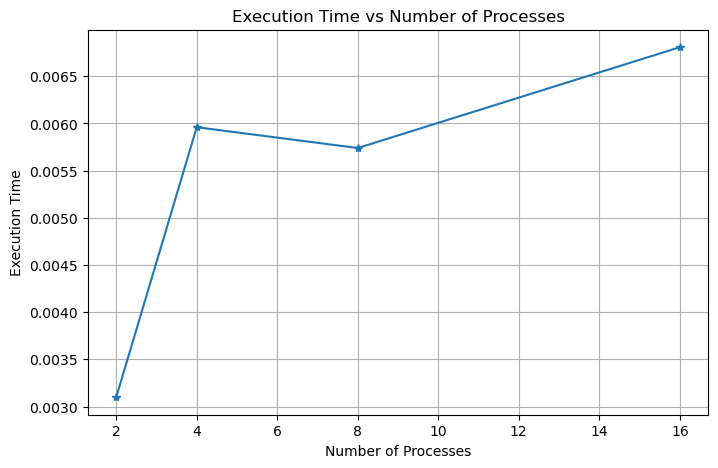

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(ranks, total_time, marker='*')
plt.title('Execution Time vs Number of Processes')
plt.xlabel('Number of Processes')
plt.ylabel('Execution Time')
plt.grid(True)
plt.show()